In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import time


In [103]:
class TSP:
    
    def __init__(self,list_pts):
        self.list_pts = list_pts
        self.solution=[]
    
    def solve(self):
        
        current_cost=float('inf')
        frames=[]
        for k in range(len(self.list_pts)):
            
            current_solution=[]
            
            
            distance_matrix=distance.cdist(self.list_pts, self.list_pts, 'euclidean')

            num_starting_point=k
            starting_point = self.list_pts[num_starting_point,:]
            
            
            
            current_solution.append(starting_point)

            for i in range(len(self.list_pts)):

                distance_matrix[i,i]=float('inf')
                distance_matrix[i,num_starting_point]=float('inf')


            num_next_point=num_starting_point

            for i in [i for i in range(len(self.list_pts)) if  i!=num_starting_point]:

                num_next_point=np.argmin(distance_matrix[num_next_point,:])
                next_point = self.list_pts[num_next_point,:]
                current_solution.append(next_point)

                for j in range(len(self.list_pts)):

                    distance_matrix[j,num_next_point]=float('inf')

            current_solution.append(starting_point)
            if self.cost(current_solution)<self.cost(self.solution):
                self.solution=current_solution
                
            frames.append(self.display())
            
        return(self.solution)
    
    def display(self):
        
        if (self.solution==[]):
                self.solve()
                
        
        x=[i[0] for i in self.solution]
        y=[i[1] for i in self.solution]

        plt.plot(x, y, marker="o", markerfacecolor="r")
        
    def cost(self,current_list):
        
        if (current_list!=[]):
                return(np.sum(distance.cdist(current_list, current_list, 'euclidean'))/2)
        else:
                return(float('inf'))
        
        

In [104]:
# list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
import random


nums = list(range(0, 60)) # list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
random.shuffle(nums)

pts_list=np.array(nums).reshape((30,2))
pts_list



array([[39, 58],
       [40, 12],
       [55, 44],
       [59, 38],
       [34, 17],
       [54, 21],
       [23, 22],
       [ 8, 49],
       [32, 45],
       [ 3,  7],
       [ 4, 31],
       [28, 51],
       [36, 14],
       [13,  9],
       [33, 30],
       [29, 27],
       [35, 11],
       [ 5, 42],
       [50, 56],
       [37, 20],
       [ 6, 52],
       [48, 25],
       [43, 16],
       [18, 41],
       [19,  1],
       [24, 46],
       [15, 47],
       [ 2, 26],
       [ 0, 10],
       [57, 53]])

0.030999999959021807


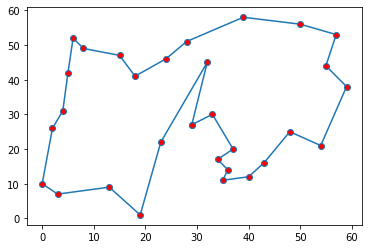

In [105]:
test=TSP(pts_list)


#test.solution

start = time.monotonic()
test.display()
end = time.monotonic()
print(end - start)

In [114]:
pip install gif==3.0.0

Note: you may need to restart the kernel to use updated packages.


In [115]:
import gif
from random import randint
from matplotlib import pyplot as plt


In [117]:
x = [randint(0, 100) for _ in range(100)]
y = [randint(0, 100) for _ in range(100)]

# (Optional) Set the dots per inch resolution to 300
gif.options.matplotlib["dpi"] = 300

# Decorate a plot function with @gif.frame
@gif.frame
def plot(i):
    xi = x[i*10:(i+1)*10]
    yi = y[i*10:(i+1)*10]
    plt.scatter(xi, yi)
    plt.xlim((0, 100))
    plt.ylim((0, 100))

# Construct "frames"
frames = [plot(i) for i in range(10)]

# Save "frames" to gif with a specified duration (milliseconds) between each frame
gif.save(frames, 'example.gif', duration=50)



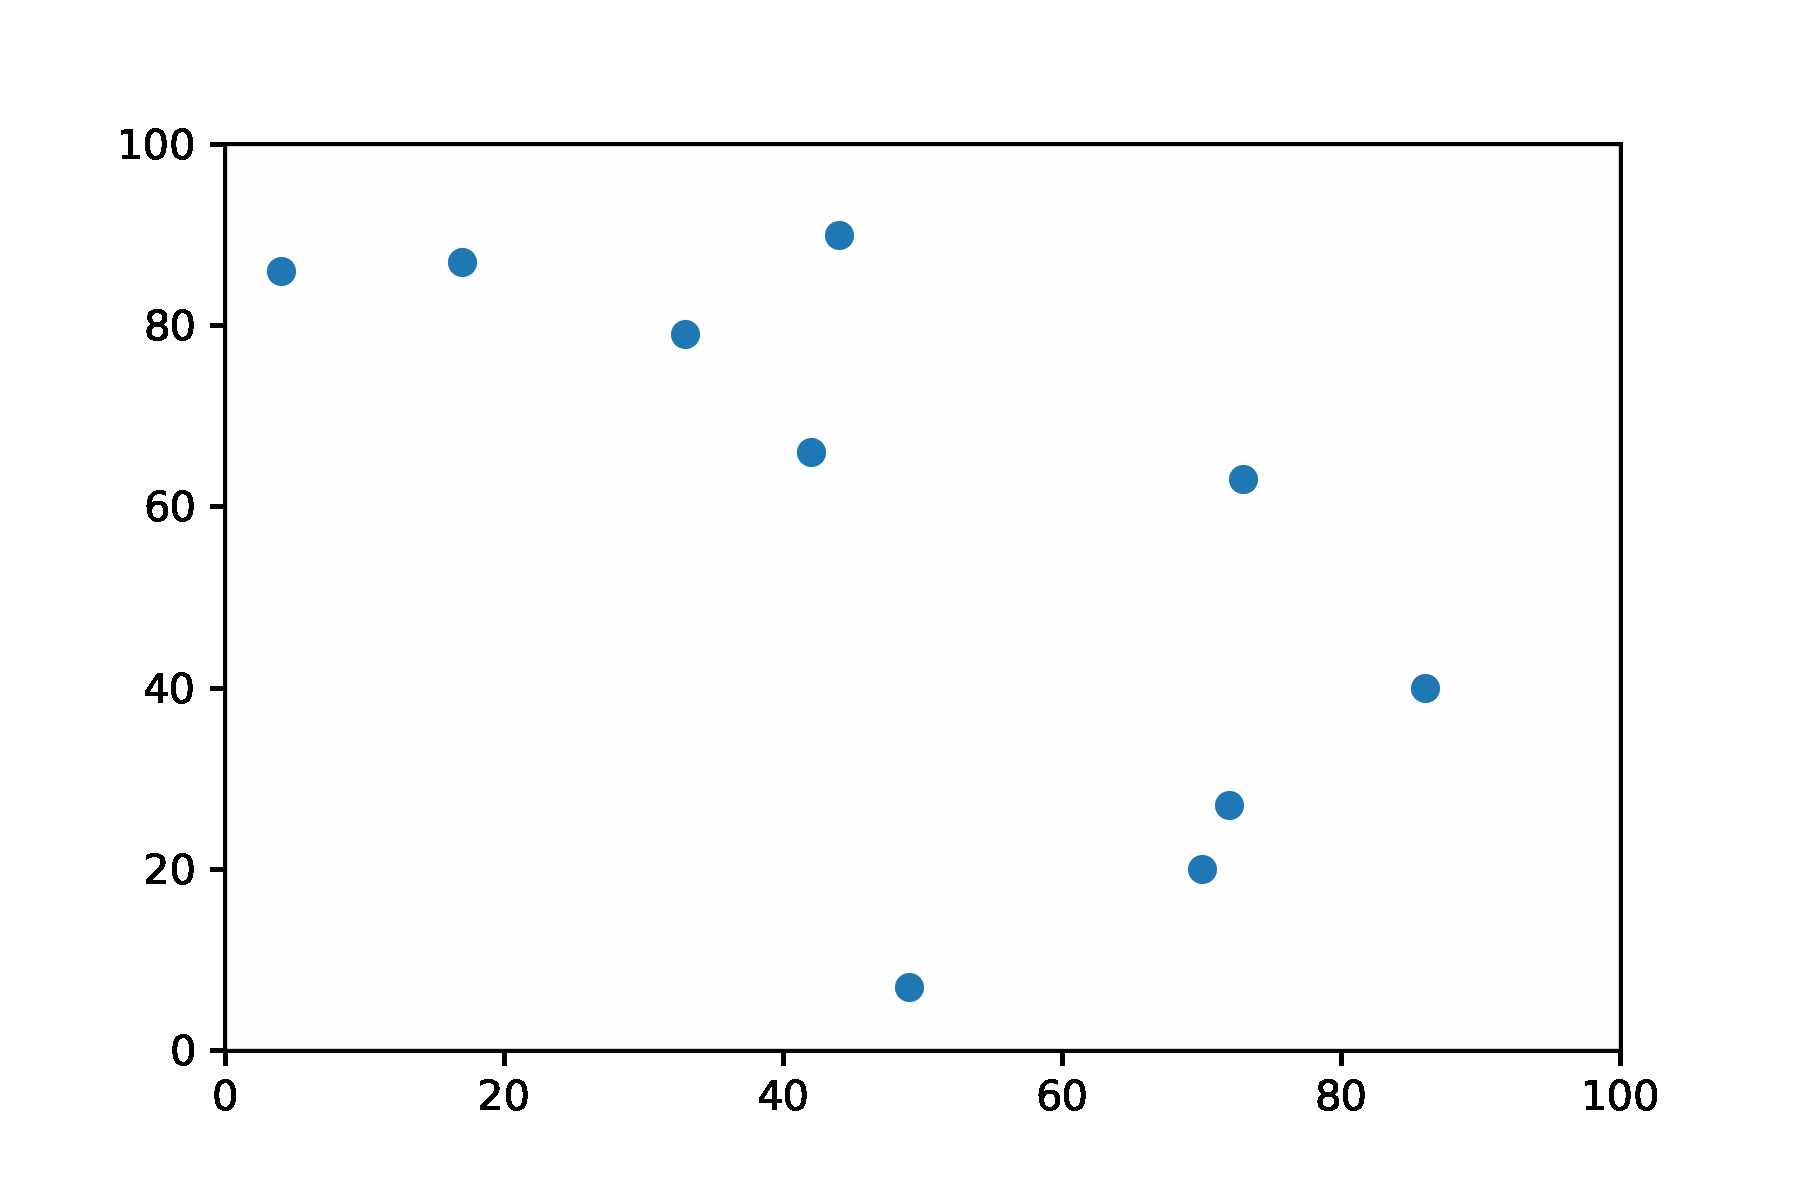

In [118]:
from IPython.display import display, Image

display(Image(filename="example.gif"))